In [0]:
#Implementing the Keaggle Classification Chellenge project [ ]

# Importing and Shapping the data for convolution NN

from google.colab import files
files.upload()

!mkdir -p /root/.kaggle
!cp kaggle.json /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json
!ls /root//.kaggle


Saving kaggle.json to kaggle.json
kaggle.json


In [0]:
import kaggle
kaggle.api.authenticate()
!kaggle competitions download -c artificial-neural-networks-and-their-applications
!mkdir project
!mv *.tar.gz project/
!ls .

!tar -xzf project/train.tar.gz
!tar -xzf project/test_images.tar.gz

  0% 0.00/608k [00:00<?, ?B/s]
100% 608k/608k [00:00<00:00, 42.0MB/s]
 69% 9.00M/13.0M [00:00<00:00, 18.3MB/s]
100% 13.0M/13.0M [00:00<00:00, 20.5MB/s]
 92% 121M/132M [00:01<00:00, 69.6MB/s]
100% 132M/132M [00:02<00:00, 67.8MB/s]
kaggle.json  project  sample_data


In [0]:
# Train and testing data formating 
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow import keras
train_x = np.zeros((90000,64*64*3))
valid_x = np.zeros((10000,64*64*3))
train_y = np.array([])
valid_y = np.array([])
class_mapping = {}
indx = 0
indx2 = 0
indx3 = 0
class_id = 0
for category in os.listdir("project/train"):
    print(category)
  
    for img in os.listdir("project/train/"+category+"/images"):
        images = imread("project/train/"+category+"/images/"+img)
        images_n = np.float32(images/255.0)
        if len(images.shape)==2:
            images_n = np.zeros((64,64,3))
            for i in range(3):
                images_n[:,:,i] = np.float32(images/255.0)
#         mean = np.mean(images, axis=(0,1), keepdims=True)
#         std = np.std(images, axis=(0,1), keepdims=True)
#         images_n = np.float32((images - mean) / std)
        
     #Handling the grayscale images separately by copying the same information over the 3 channels
#         if len(images.shape)==2:
#             images_n = np.zeros((64,64,3))
#             for i in range(3):
#                 images_n[:,:,i] = np.float32(images/255.0)
                #images_n[:,:,i] = images
      #Collecting the validation dataset
        if 500 > indx3 >= 450:
          valid_x[indx2,:] = np.reshape(images_n, [1,64*64*3])
          valid_y= np.append(valid_y, class_id)
          indx2 +=1
          #print("Entered first loop", indx3, indx2, indx, test_y)
        else:
          train_x[indx,:] = np.reshape(images_n, [1,64*64*3])
          train_y= np.append(train_y, class_id)
         #print("Entered second Loop", indx3, indx2, indx, train_y)
          indx +=1
                     
        indx3 +=1   
    class_mapping[class_id] = category
    indx3 = 0
    class_id +=1
    
#Chaning the dimension for Convolution input as images
train_x = train_x.reshape(-1,64,64,3)
valid_x = valid_x.reshape(-1,64,64,3)
train_y = keras.utils.to_categorical(train_y,200)
valid_y =  keras.utils.to_categorical(valid_y,200)
print(indx, indx2, train_x.shape, valid_x.shape, train_y.shape, valid_y.shape)


In [0]:
# Generating the Test data 

import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow import keras
test_x = np.zeros((10000,64*64*3))
test_filenames = []
idx4 = 0
for img in os.listdir("test_images"):
    image = imread("test_images/"+img)
    image_n = np.float32(image/255.0) # normalize the image
    test_filenames.append(img)    
    #handle grayscale images
    if len(image.shape) ==2:
        #print(img, image.shape)
        image_n = np.zeros((64,64,3))
        for i in range(3):
            image_n[:,:,i] = np.float32(image/255.0)
    #flatten the image
    test_x[idx4,:] =  np.reshape(image_n, [1,64*64*3])
    idx4 += 1
print(test_x.shape)


Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxP

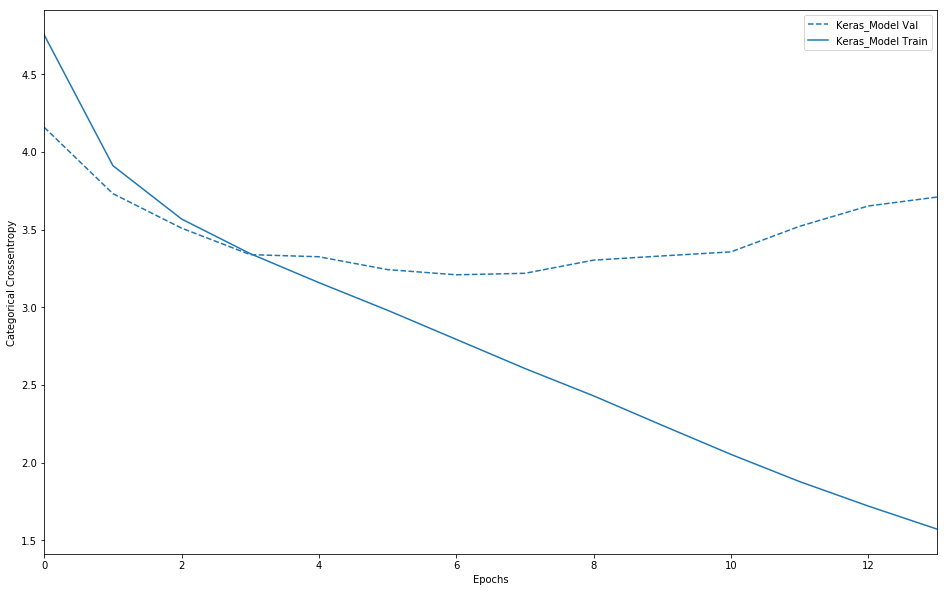

In [0]:
# Implementing the keras CNN
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, ZeroPadding2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.examples.tutorials.mnist import input_data
from keras import regularizers

model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), activation= 'relu', padding='same', input_shape= (64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same',kernel_regularizer= keras.regularizers.l2(.001)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(128, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(500, activation='relu', kernel_regularizer= keras.regularizers.l2(.001)))
model.add(BatchNormalization())
model.add(Dense(200, activation='softmax'))
model.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy', 'categorical_crossentropy'])
model.summary()


# model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=[64,64,3], padding="same"))
# model.add(MaxPooling2D(pool_size=(3, 3)))
# model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"))
# model.add(MaxPooling2D(pool_size=(3, 3)))
# model.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same",kernel_regularizer=regularizers.l2(0.001)))
# model.add(MaxPooling2D(pool_size=(3, 3)))
# model.add(Flatten())
# model.add(Dense(1500, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(200, activation='softmax'))
# model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy','categorical_crossentropy'])



#train_data_1=train_data2.reshape(train_data2.shape[0],28,28,1)
#test_data_1=test_data2.reshape(test_data2.shape[0],28,28,1)

keras_model_history=model.fit(train_x, train_y, validation_data = (valid_x, valid_y), batch_size=400, epochs=14, verbose = 2)

def plot_history(histories, key='categorical_crossentropy'):
  plt.figure(figsize=(16,10))
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')
  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()
  plt.xlim([0,max(history.epoch)])

plot_history([('Keras_model', keras_model_history)])


In [0]:
# Submission of results
#class_mapping = [None]*200
test_x = test_x.reshape(-1,64,64,3)
predictions = list(model.predict_classes(test_x))
#preds = list(model.predict(input_fn_test))

f = open('submission.csv', 'w')
f.write('Id,Category\n') # write header
for idx4, pred_label in enumerate(predictions):
    f.write('%s,%s\n' % (test_filenames[idx4], class_mapping[pred_label]))
    
f.close()

In [0]:
print(list(predictions))